<a href="https://colab.research.google.com/github/StefanHubner/MachineLearningEconomics/blob/main/MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Bias-Variance Tradeoff Using Splines

In machine learning, selecting the right model complexity is crucial. A model that's too simple might not capture the underlying patterns (underfitting), while a very complex model might fit the noise in the training data (overfitting). This balance is referred to as the bias-variance tradeoff.

The upcoming code aims to:

1. **Setup**: Load the necessary libraries for plotting and modeling.
2. **Data Simulation**: Generate synthetic data using a sine function combined with noise, simulating a non-linear pattern.
3. **Data Splitting**: Divide the data into training and test sets. The training set is for building the model, and the test set is for evaluating its performance.
4. **Modeling & Evaluation**:
    - For various model complexities, we will fit splines to the training data. Splines are piecewise polynomial functions that can approximate complex patterns.
    - The model's performance will be evaluated using Mean Squared Error (MSE) for both training and test data.

By the end, we'll have a clearer understanding of how changing the model's complexity impacts its performance, paving the way to visualize and explore the bias-variance tradeoff.



In [2]:
# Load required libraries
library(ggplot2)
library(splines)

# Plot dimensions
options(repr.plot.width = 15, repr.plot.height = 8)

# Simulate data
set.seed(1234)
n <- 150
x <- seq(0, 4 * pi, length.out = n)
y <- sin(x) + sqrt(x) * rnorm(n, sd = .5)
data <- data.frame(y = y, x = x)

# Split into training and test data
train_indices <- sample(1:n, n/2)
data[,"Type"] <- "Test"
data[train_indices, "Type"] <- "Train"
train_data <- data[train_indices,]
test_data <- data[-train_indices,]

# Fit splines and compute MSE
splines_k <- c(1, 2, 4, 8, 16, 32)
models <- list()
train_mse <- numeric()
test_mse <- numeric()
df_pred <- data.frame()

for (k in splines_k) {
  model <- lm(y ~ ns(x, df = k), data = train_data)

  pred_train <- predict(model, train_data)
  pred_test <- predict(model, test_data)

  df_pred <- rbind(df_pred, cbind(train_data$x, pred_train, k))

  train_mse <- c(train_mse, mean((train_data$y - pred_train)^2))
  test_mse <- c(test_mse, mean((test_data$y - pred_test)^2))
}

## Plotting the Results

### 1. Fitted Splines Plot (`p1`)

This plot showcases how splines of different complexities fit the data.

- **Data Points**: The dots represent the original data, with different colors indicating whether they are from the training set or the test set.
- **Fitted Curves**: The lines display the fit of the splines to the training data. Each line corresponds to a spline of a specific complexity (defined by the degrees of freedom, or "k").

This visualization helps in observing how increasing the model's complexity (adding more splines) affects the fit to the training data. Ideally, the right model will closely fit the underlying pattern without becoming overly intricate.




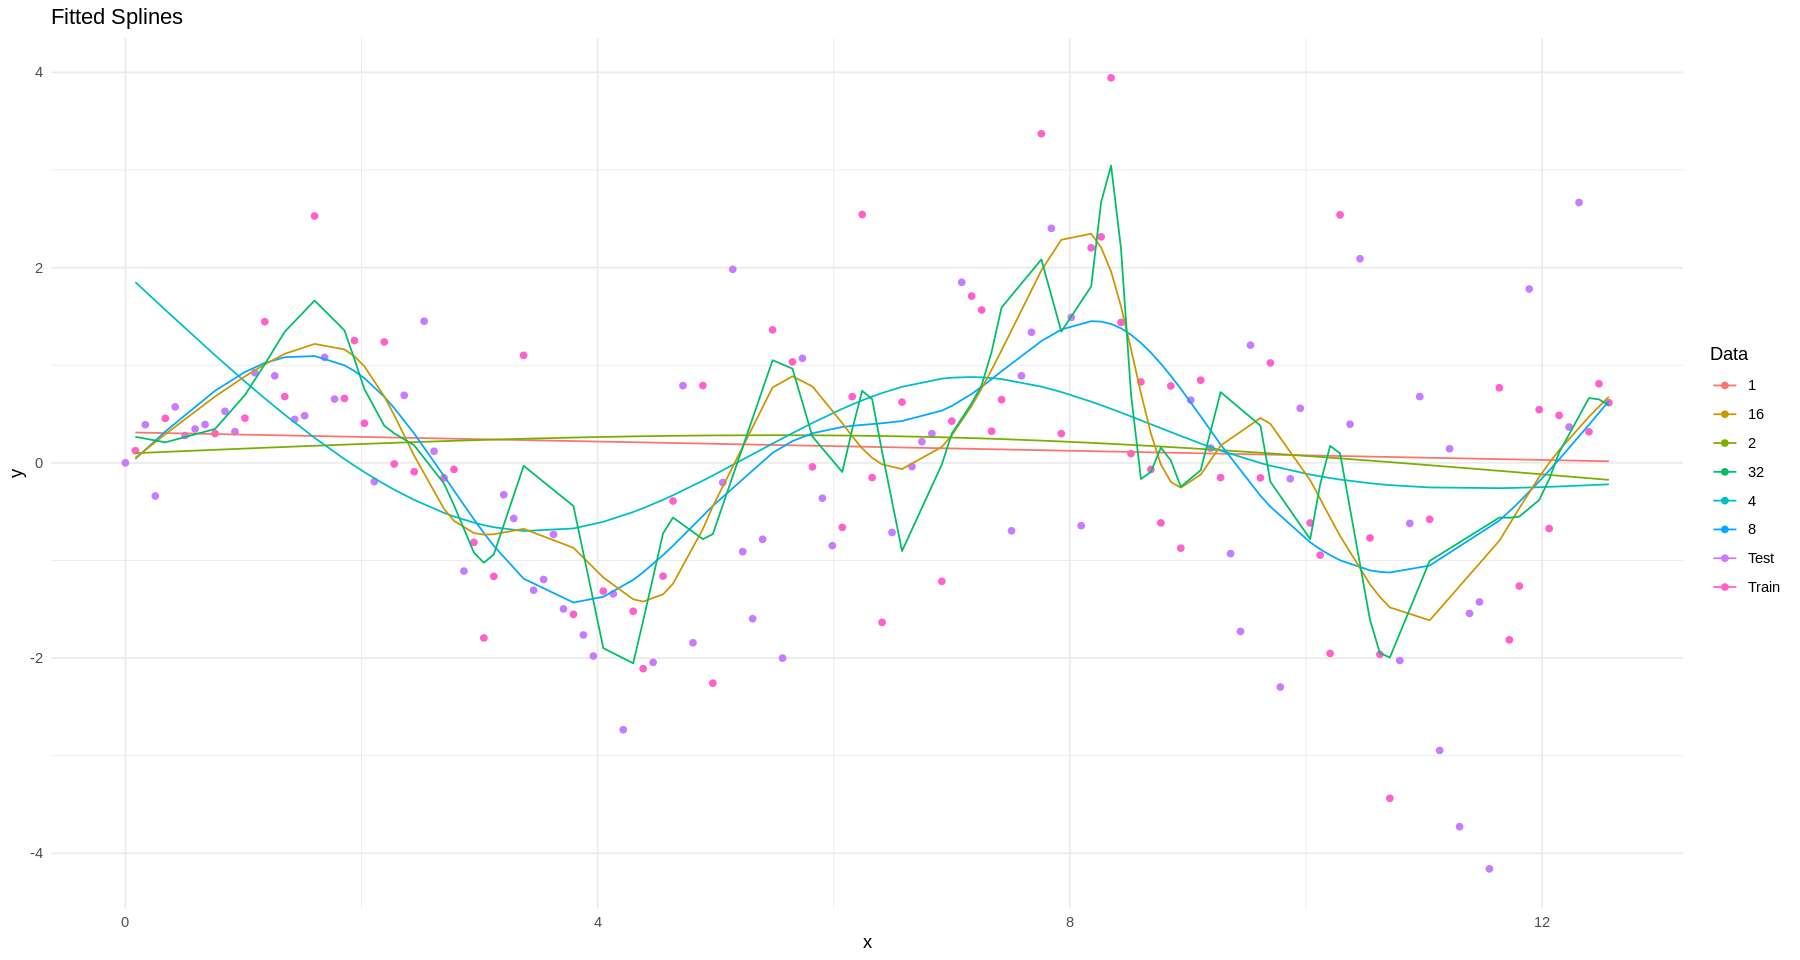

In [3]:
# Plot
mse_df <- cbind(expand.grid(splines_k, c("Train", "Test")), c(train_mse, test_mse))
names(mse_df) <- c("K", "Type", "MSE")

# Fitted curves plot
p1 <- ggplot(data, aes(x = x, y = y, color = Type)) +
  geom_point() +
  geom_line(data = df_pred, aes(x = V1, y = pred_train, color = factor(k))) +
  labs(title="Fitted Splines", color="Data") +
  theme_minimal()

p1

### 2. MSE by Number of Splines Plot (`p2`)

This plot provides insights into the model's performance based on its complexity.

- **X-axis**: Represents the number of splines (complexity) used in the model.
- **Y-axis**: Shows the Mean Squared Error (MSE), a measure of how well the model predicts the data.
- **Lines & Points**: Indicate the MSE for both the training data and the test data. Lower MSE values suggest better predictions.

This graph allows for the direct comparison of model performance on the training and test datasets at varying complexities. Observing the point where the test error starts to increase can indicate where the model begins to overfit.

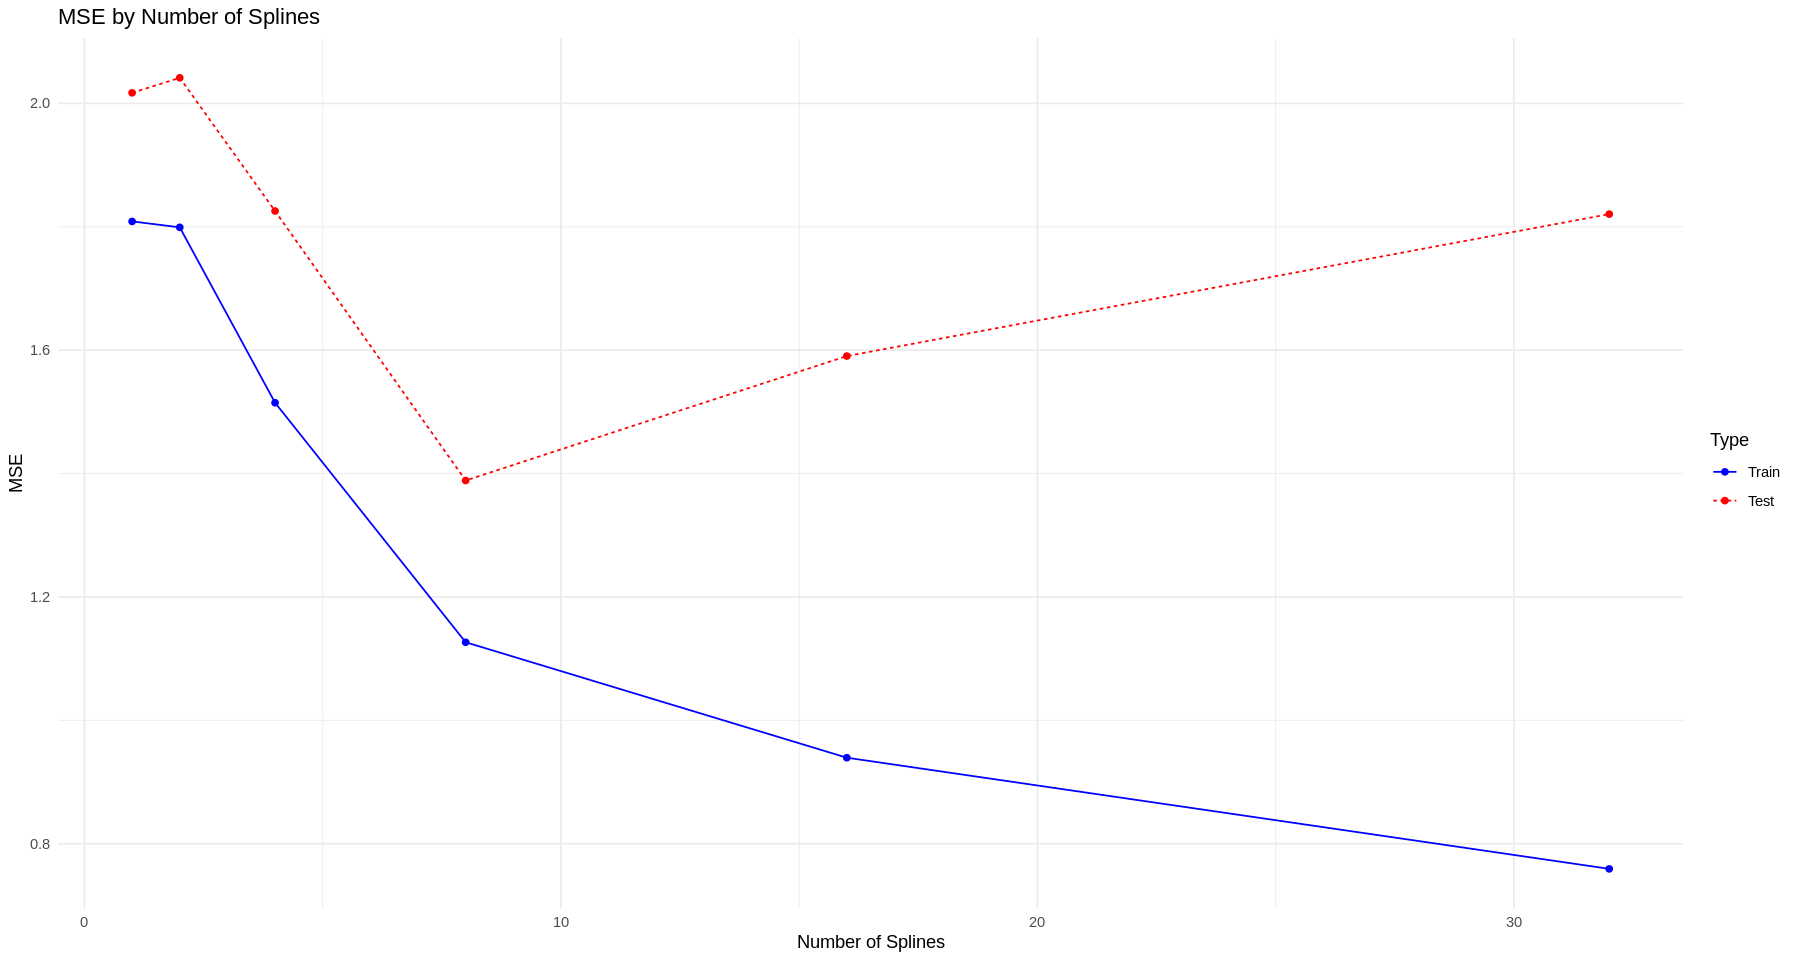

In [4]:
# MSE plot
p2 <- ggplot(mse_df, aes(x = (K), y = MSE, color = Type)) +
  geom_line(aes(linetype = Type)) +
  geom_point() +
  labs(title="MSE by Number of Splines", x = "Number of Splines", y = "MSE") +
  scale_color_manual(values = c("Train" = "blue", "Test" = "red")) +
  theme_minimal()

p2